In [38]:
import torch
import matplotlib.pyplot as plt
import pyvista as pv
import json
import pandas as pd
# pd.options.display.float_format = '{:,.2f}'.format
import glob 
pv.set_jupyter_backend('static')

OFFSET=0
RESULTS = "./results_gen/"


In [39]:
def plot_pcs(ref_pcs, sample_pcs):
    pl = pv.Plotter(shape=(2,10), window_size=[2000, 400],border=False,polygon_smoothing=True)

    for col in range(10):
        points = ref_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
        pl.subplot(0, col)
        actor = pl.add_points(
            points,
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            scalars=points[:, 2],
            point_size=2,
            ambient=0.2, 
            diffuse=0.8, 
            specular=0.8,
            specular_power=40, 
            smooth_shading=True
        )
        points = sample_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
        pl.subplot(1, col)
        actor = pl.add_points(
            points,
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            scalars=points[:, 2],
            point_size=2,
            ambient=0.2, 
            diffuse=0.8, 
            specular=0.8,
            specular_power=40, 
            smooth_shading=True
        )

    pl.background_color = "w"
    pl.link_views()
    pl.camera_position = "xy"
    pos = pl.camera.position
    pl.camera.position = (pos[0],pos[1]+3,pos[2])
    pl.camera.position = (2,0,0)
    pl.camera.azimuth = 45
    pl.camera.elevation = 30
    # create a top down light
    light = pv.Light(position=(0, 0, 0), positional=True,
                    cone_angle=50, exponent=20, intensity=.2)
    pl.add_light(light)
    pl.camera.zoom(1.3)
    pl.show()

In [40]:
def table_to_latex_row(dg):
    table_row = ""
    for record in dg[["1-NN-CD-acc","1-NN-EMD-acc"]].to_records(index=False):
        for idx in range(0,len(record),2):
            table_row += f'${record[idx]:,.2f} \pm {record[idx+1]:,.2f}$ & '

    table_row = table_row[:-2] + '\\\\'
    return table_row


# Reconstruction Results

In [41]:
fn = glob.glob("./results_gen/**/**.json")
results = []
for filename in fn:
    with open(filename,"r") as f:
        results.extend(json.load(f))

df = pd.DataFrame(results)
df["1-NN-CD-acc"] = df["1-NN-CD-acc"] * 100
df["1-NN-EMD-acc"] = df["1-NN-EMD-acc"] * 100
df["normalized"] = df["normalized"].astype(str)


In [42]:
dg = df[["1-NN-CD-acc","1-NN-EMD-acc","model","cate","normalized"]].groupby(["normalized","model","cate",]).agg(["mean","std"])
dg

1-NN-CD-acc     1-NN-EMD-acc    
                                     mean std         mean std
normalized model     cate                                     
False      PointFlow airplane   73.827159 NaN    71.851850 NaN
                     car        58.238637 NaN    51.562500 NaN
                     chair      60.725075 NaN    55.891240 NaN
           VAE       airplane   76.049381 NaN    77.901232 NaN
                     car        60.369319 NaN    73.721594 NaN
                     chair      62.462234 NaN    73.036253 NaN
True       VAE       airplane   81.481481 NaN    88.641977 NaN
                     car        65.909094 NaN    82.244319 NaN
                     chair      69.864047 NaN    77.039278 NaN

In [43]:
models = dg.index.get_level_values('model').unique().tolist()

In [44]:
print("Unnormalized Results")
for model in models: 
    table_row = f"{model} &" + table_to_latex_row(dg.loc["False",model])
    print(table_row)

print("Normalized Results")
for model in models: 
    try: 
        row = dg.loc["True",model]
        table_row = f"{model} &" + table_to_latex_row(row)
        print(table_row)
    except KeyError:
        print(f"{model} not found")
    

Unnormalized Results
PointFlow &$73.83 \pm nan$ & $71.85 \pm nan$ & $58.24 \pm nan$ & $51.56 \pm nan$ & $60.73 \pm nan$ & $55.89 \pm nan$ \\
VAE &$76.05 \pm nan$ & $77.90 \pm nan$ & $60.37 \pm nan$ & $73.72 \pm nan$ & $62.46 \pm nan$ & $73.04 \pm nan$ \\
Normalized Results
PointFlow not found
VAE &$81.48 \pm nan$ & $88.64 \pm nan$ & $65.91 \pm nan$ & $82.24 \pm nan$ & $69.86 \pm nan$ & $77.04 \pm nan$ \\


# VAE Samples
### Airplane 

################################################################################
###  PointFlow
################################################################################


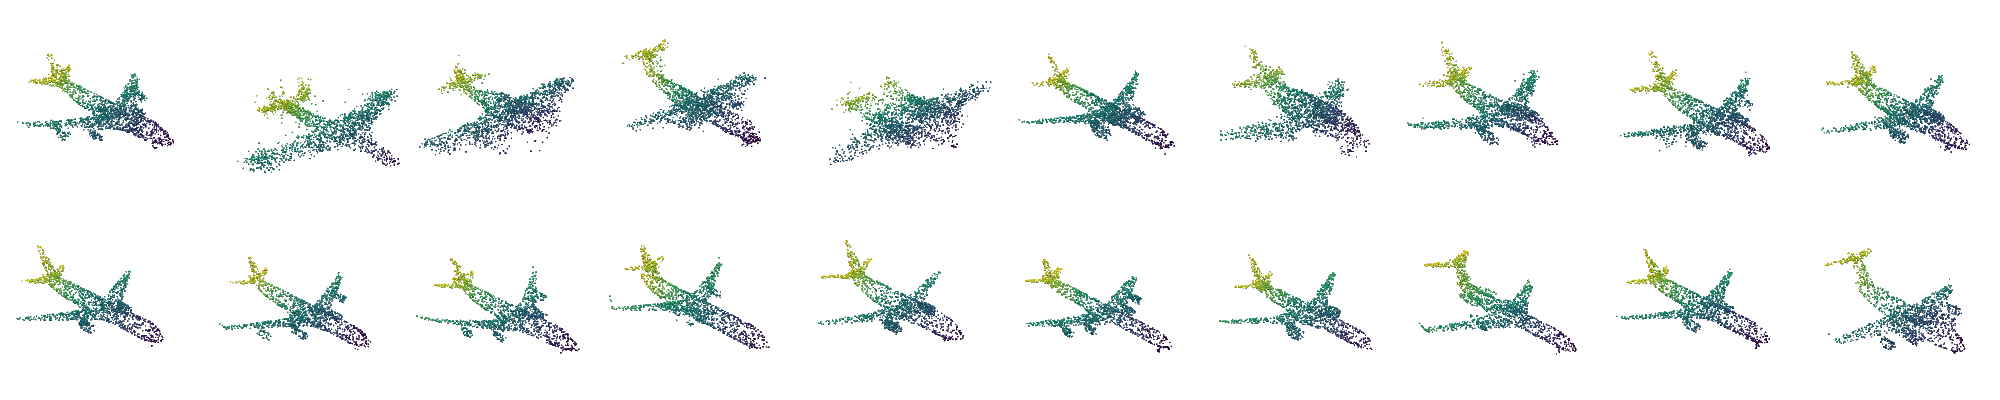

################################################################################
###  VAE
################################################################################


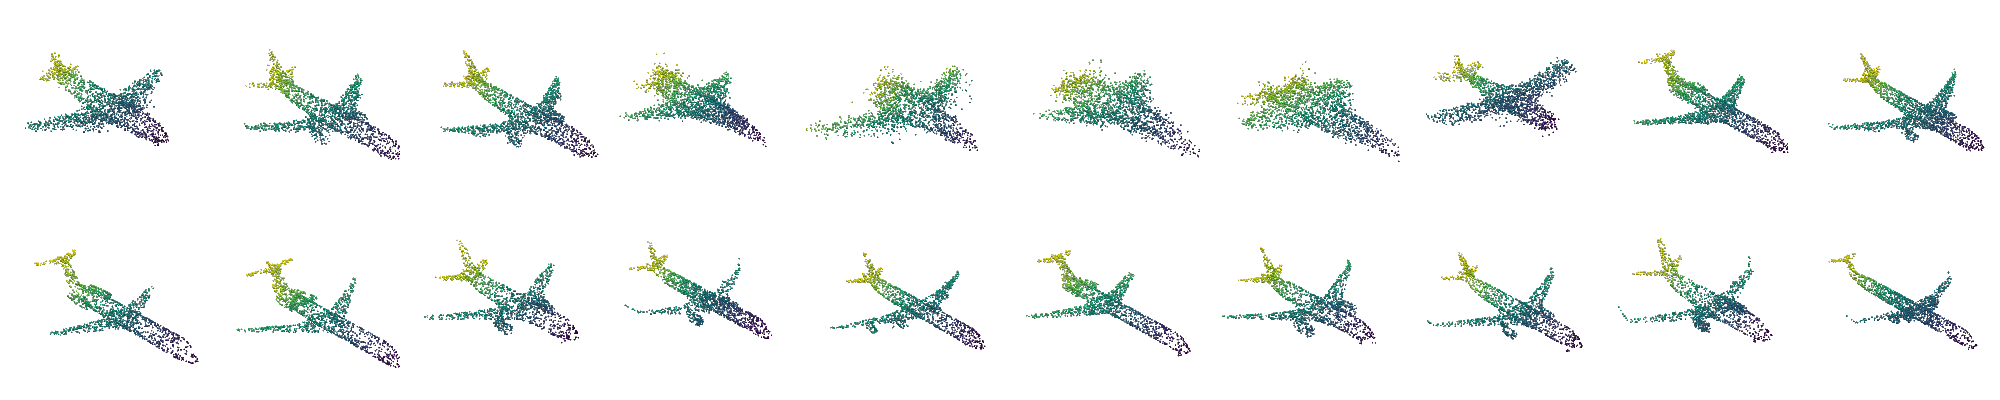

In [45]:
for model in models: 
    print(80*"#")
    print(f"###  {model}")
    print(80*"#")
    sample_pcs = torch.load(RESULTS + f"{model}"+'/samples_airplane.pt')
    ref_pcs = torch.load(RESULTS + f"{model}"+'/ref_airplane.pt')
    plot_pcs(sample_pcs,ref_pcs)

# Car 

################################################################################
###  PointFlow
################################################################################


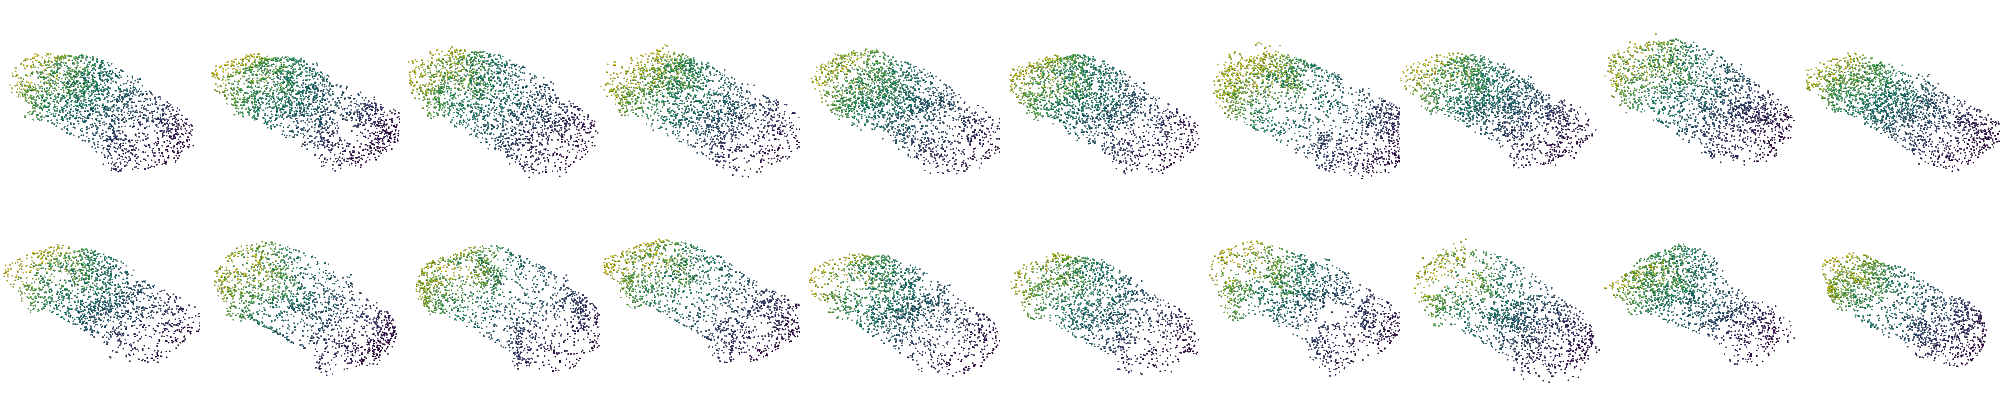

################################################################################
###  VAE
################################################################################


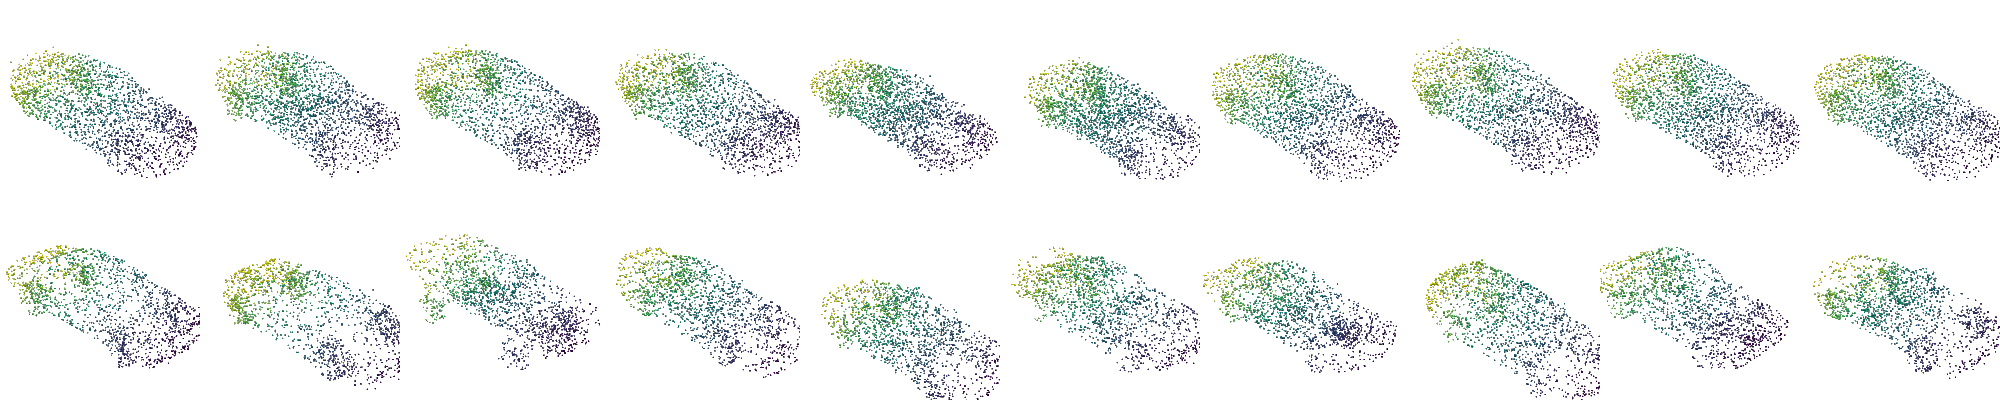

In [46]:
for model in models: 
    print(80*"#")
    print(f"###  {model}")
    print(80*"#")
    sample_pcs = torch.load(RESULTS + f"{model}"+'/samples_car.pt')
    ref_pcs = torch.load(RESULTS + f"{model}"+'/ref_car.pt')
    plot_pcs(sample_pcs,ref_pcs)

# Chair

################################################################################
###  PointFlow
################################################################################


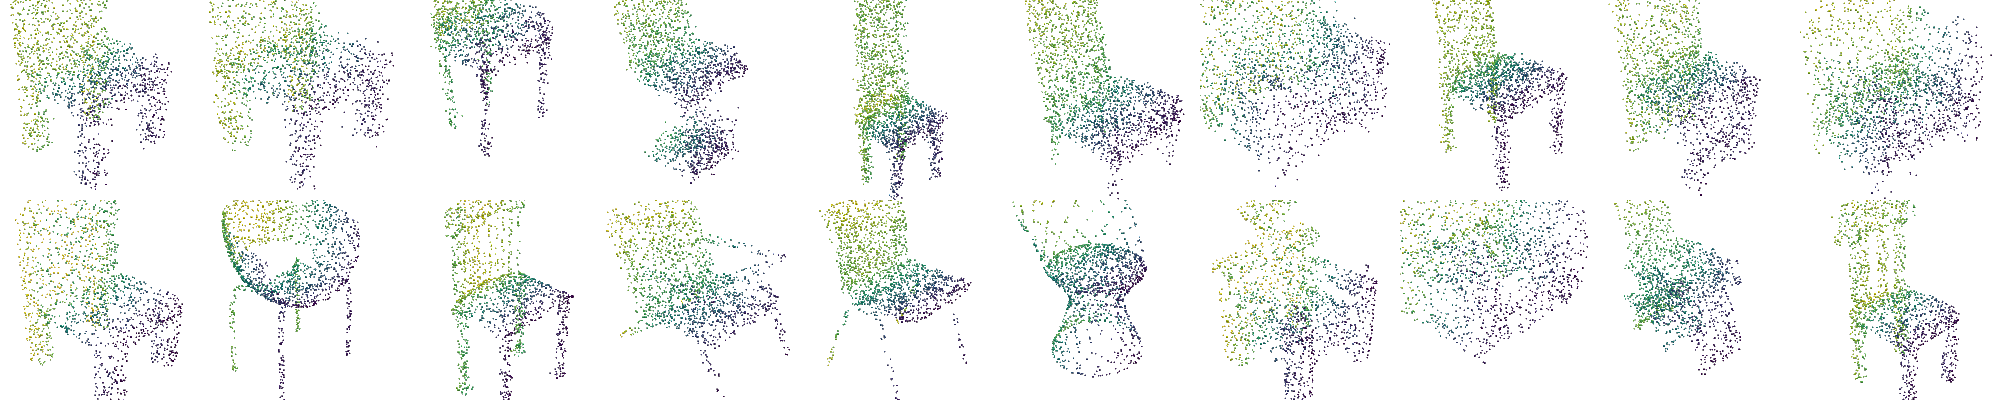

################################################################################
###  VAE
################################################################################


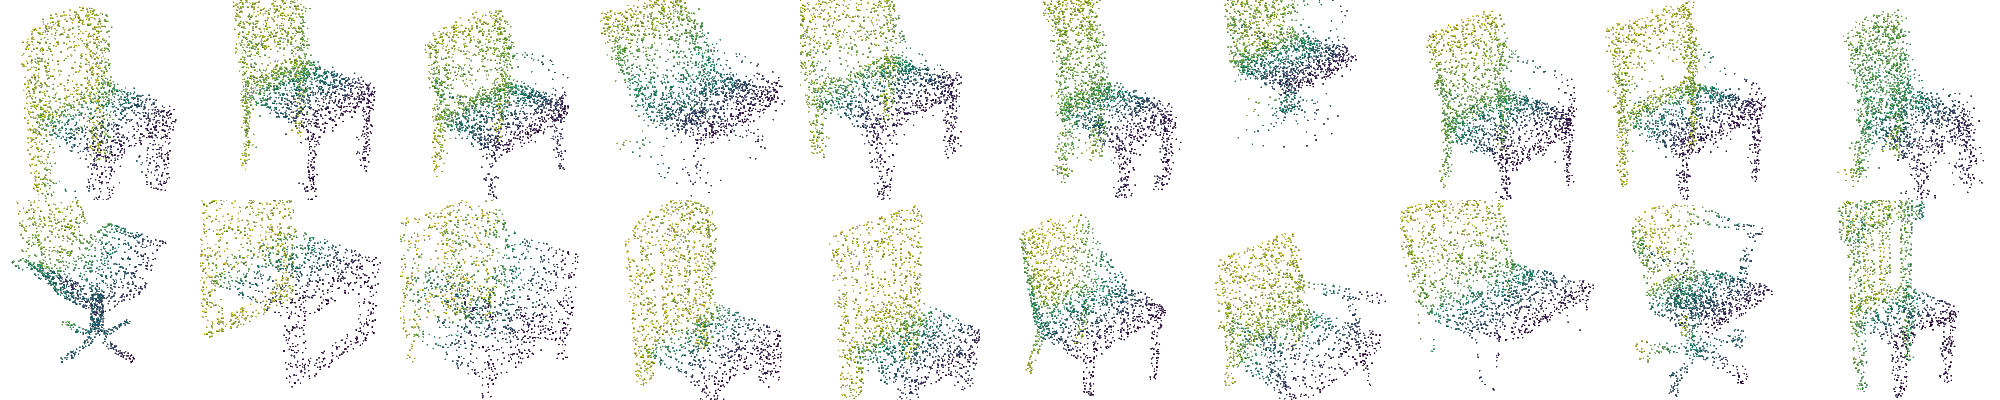

In [47]:
for model in models: 
    print(80*"#")
    print(f"###  {model}")
    print(80*"#")
    sample_pcs = torch.load(RESULTS + f"{model}"+'/samples_chair.pt')
    ref_pcs = torch.load(RESULTS + f"{model}"+'/ref_chair.pt')
    plot_pcs(sample_pcs,ref_pcs)